# Edges



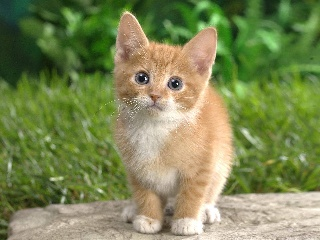

In [1]:
(ns opencv4.threshold
  (:require
    [opencv4.core :refer :all]
    [opencv4.utils :as u]))

(def neko
  (->
  "resources/images/cat.jpg"
  imread
  (u/resize-by 0.2)))
(u/>>> neko)

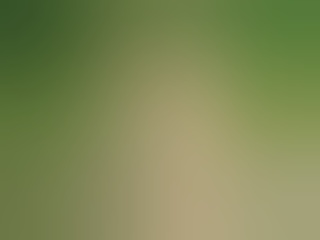

In [8]:
(def factor 6)
(def background (new-mat))
(def work (clone neko))

(dotimes [_ factor] (pyr-down! work))
(bilateral-filter work background 9 9 7)
(dotimes [_ factor] (pyr-up! background))
(resize background background (new-size (.cols neko) (.rows neko)))
(u/>>> background)

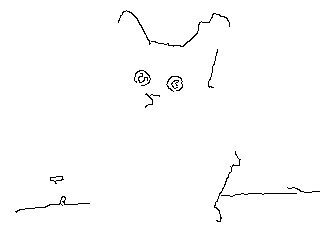

In [9]:
(def
  c
  (-> neko
  clone
  (blur! (new-size 3 3))
  (cvt-color! COLOR_BGR2GRAY)
  (canny! 300.0 100.0 3 true)
  (bitwise-not!)
  (cvt-color! COLOR_GRAY2BGR)  ))
(u/>>> c)

In [10]:
(println background)
(println c)

#object[org.opencv.core.Mat 0x5c0a141c Mat [ 240*320*CV_8UC3, isCont=true, isSubmat=false, nativeObj=0x7efe2020bbe0, dataAddr=0x7efe20380c00 ]]
#object[org.opencv.core.Mat 0x382f3993 Mat [ 240*320*CV_8UC3, isCont=true, isSubmat=false, nativeObj=0x7efe20198480, dataAddr=0x7efe203b9040 ]]


nil

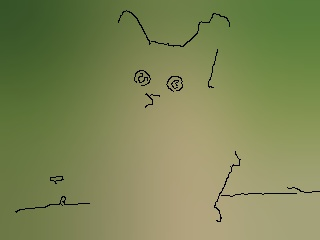

In [11]:
(let [result (new-mat) ]
  (bitwise-and background c result)
  (u/>>> result))

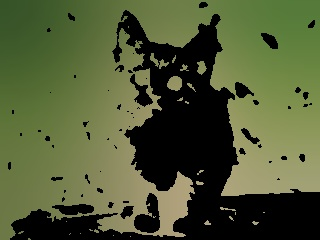

In [12]:
(def t
(-> neko
  clone
  (blur! (new-size 3 3))
  (cvt-color! COLOR_BGR2GRAY)
  (threshold! 150 255 THRESH_BINARY_INV)
  (cvt-color! COLOR_GRAY2BGR)  ))

(let [result (new-mat) ]
  (bitwise-and background t result)
  (u/>>> result))